In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx import *
import random
from scipy.spatial.distance import pdist, squareform
from networkx.algorithms.approximation import min_weighted_dominating_set
from itertools import product  
# from age_calculation import *

# from networkx.algorithms.approximation import dominating_set
from parameters import *
# from create_graph_1 import *
from itertools import combinations
import pickle

%matplotlib inline  


In [10]:
def running_mean(x): #, N = 5):
    N = 100
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [11]:
# exp 2
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/new/exp2/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


DQN_age_dist_BS_8U = pickle.load(open(path_RP + "8U_DQN_age_dist_BS.pickle", "rb"))
print((DQN_age_dist_BS_8U.keys()))
print(len(DQN_age_dist_BS_8U[10]))

mad_age_dist_BS_8U = pickle.load(open(path_RP + "8U_mad_age_dist_BS.pickle", "rb"))
print((mad_age_dist_BS_8U.keys()))
print(len(mad_age_dist_BS_8U[10]))

random_age_dist_BS_8U = pickle.load(open(path_RP + "8U_random_age_dist_BS.pickle", "rb"))
print((random_age_dist_BS_8U.keys()))
print(len(random_age_dist_BS_8U[10]))

greedy_age_dist_BS_8U = pickle.load(open(path_RP + "8U_greedy_age_dist_BS.pickle", "rb"))
print((greedy_age_dist_BS_8U.keys()))
print(len(greedy_age_dist_BS_8U[10]))


dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
10002
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998


In [12]:
devices = [10, 11, 12, 13, 14, 15, 16, 17]
dqn = []
mad = []
random = []
greedy = []

dqn_std = []
mad_std = []
random_std = []
greedy_std = []

for i in devices:
    dqn.append(np.mean(DQN_age_dist_BS_8U[i][-10:]))
    dqn_std.append(np.std(DQN_age_dist_BS_8U[i][-10:]))

    mad.append(np.mean(mad_age_dist_BS_8U[i][-10:]))
    mad_std.append(np.std(mad_age_dist_BS_8U[i][-10:]))

    random.append(np.mean(random_age_dist_BS_8U[i][-10:]))
    random_std.append(np.std(random_age_dist_BS_8U[i][-10:]))
    
    greedy.append(np.mean(greedy_age_dist_BS_8U[i][-10:]))
    greedy_std.append(np.std(greedy_age_dist_BS_8U[i][-10:]))



In [13]:
print(np.sum(dqn))
print(np.sum(mad))

62.599999999999994
63.5


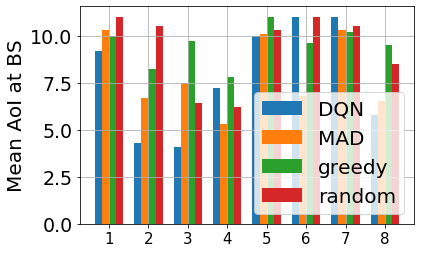

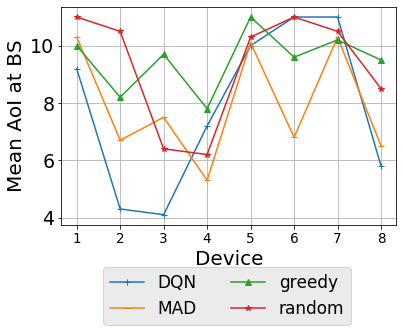

In [14]:
## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 

  
N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.18       # the width of the bars

p1 = ax.bar(ind, dqn, width, bottom=0)
p2 = ax.bar(ind + width, mad, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, random, width, bottom=0)


# ax.set_title('Scalability Analysis')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( '1', '2', '3','4', '5', '6','7', '8')) #, '250'))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=19)


ax.legend((p1[0], p2[0], p3[0], p4[0]), ('DQN', 'MAD', 'greedy','random'), fontsize=20, loc='lower right')
# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Mean AoI at BS', fontsize=20)
plt.grid('True')

#######################

fig, ax1 = plt.subplots()
devices = [1,2,3,4,5,6,7,8]

ax1.plot(devices, dqn, label = 'DQN', marker = "+")
ax1.plot(devices, mad, label = 'MAD', marker = "_")
ax1.plot(devices, greedy, label = 'greedy', marker = "^")
ax1.plot(devices, random, label = 'random', marker = "*")


# ax1.legend(bbox_to_anchor=(11, 1.05))
legend = ax1.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.1, -0.5), ncol = 2)

plt.xlabel('Device', fontsize='20')
plt.ylabel('Mean AoI at BS', fontsize='20')
# ax1.set_xticklabels(devices) #, '250'))

ax1.tick_params(axis='x', labelsize=13.5)
ax1.tick_params(axis='y', labelsize=19)
legend.get_frame().set_facecolor('0.90')
plt.grid(True)

In [15]:
# print(np.sum(dqn))
# print(np.sum(mad))
# dqn

### exp 5 individual age dist

dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
10002
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998


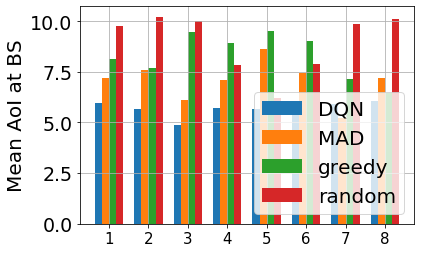

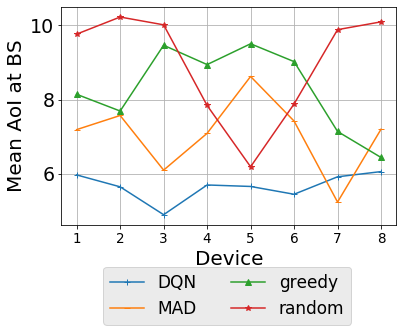

In [16]:
# exp 9
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/new_period/exp5/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


DQN_age_dist_BS_8U = pickle.load(open(path_RP + "8U_DQN_age_dist_BS.pickle", "rb"))
print((DQN_age_dist_BS_8U.keys()))
print(len(DQN_age_dist_BS_8U[10]))

mad_age_dist_BS_8U = pickle.load(open(path_RP + "8U_mad_age_dist_BS.pickle", "rb"))
print((mad_age_dist_BS_8U.keys()))
print(len(mad_age_dist_BS_8U[10]))

random_age_dist_BS_8U = pickle.load(open(path_RP + "8U_random_age_dist_BS.pickle", "rb"))
print((random_age_dist_BS_8U.keys()))
print(len(random_age_dist_BS_8U[10]))

greedy_age_dist_BS_8U = pickle.load(open(path_RP + "8U_greedy_age_dist_BS.pickle", "rb"))
print((greedy_age_dist_BS_8U.keys()))
print(len(greedy_age_dist_BS_8U[10]))

devices = [10, 11, 12, 13, 14, 15, 16, 17]
x=100
dqn = []
mad = []
randoms = []
greedy = []

dqn_std = []
mad_std = []
randoms_std = []
greedy_std = []

for i in devices:
    dqn.append(np.mean(DQN_age_dist_BS_8U[i][-x:]))
    dqn_std.append(np.std(DQN_age_dist_BS_8U[i][-x:]))

    mad.append(np.mean(mad_age_dist_BS_8U[i][-x:]))
    mad_std.append(np.std(mad_age_dist_BS_8U[i][-x:]))

    randoms.append(np.mean(random_age_dist_BS_8U[i][-x:]))
    randoms_std.append(np.std(random_age_dist_BS_8U[i][-x:]))
    
    greedy.append(np.mean(greedy_age_dist_BS_8U[i][-x:]))
    greedy_std.append(np.std(greedy_age_dist_BS_8U[i][-x:]))


import random
# dqn = random.sample(dqn, len(dqn))
# mad = random.sample(mad, len(mad))
randoms = random.sample(randoms, len(randoms))
# greedy = random.sample(greedy, len(greedy))

## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 

N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.18       # the width of the bars

p1 = ax.bar(ind, dqn, width, bottom=0)
p2 = ax.bar(ind + width, mad, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, randoms, width, bottom=0)


# ax.set_title('Scalability Analysis')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( '1', '2', '3','4', '5', '6','7', '8')) #, '250'))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=19)


ax.legend((p1[0], p2[0], p3[0], p4[0]), ('DQN', 'MAD', 'greedy','random'), fontsize=20, loc='lower right')
# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Mean AoI at BS', fontsize=20)
plt.grid('True')

#######################

fig, ax1 = plt.subplots()
devices = [1,2,3,4,5,6,7,8]



ax1.plot(devices, dqn, label = 'DQN', marker = "+")
ax1.plot(devices, mad, label = 'MAD', marker = "_")
ax1.plot(devices, greedy, label = 'greedy', marker = "^")
ax1.plot(devices, randoms, label = 'random', marker = "*")


# ax1.legend(bbox_to_anchor=(11, 1.05))
legend = ax1.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.1, -0.5), ncol = 2)

plt.xlabel('Device', fontsize='20')
plt.ylabel('Mean AoI at BS', fontsize='20')
# ax1.set_xticklabels(devices) #, '250'))

ax1.tick_params(axis='x', labelsize=13.5)
ax1.tick_params(axis='y', labelsize=19)
legend.get_frame().set_facecolor('0.90')
plt.grid(True)

### plotting for sampling times

### exp 6 individual ages

dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
10002
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998
dict_keys([10, 11, 12, 13, 14, 15, 16, 17])
199998


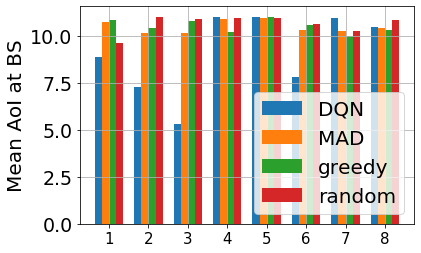

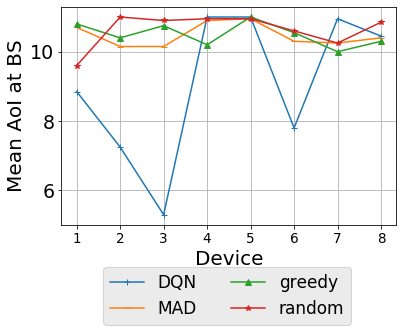

In [17]:
# exp 9
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/new/exp6/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


DQN_age_dist_BS_8U = pickle.load(open(path_RP + "8U_DQN_age_dist_BS.pickle", "rb"))
print((DQN_age_dist_BS_8U.keys()))
print(len(DQN_age_dist_BS_8U[10]))

mad_age_dist_BS_8U = pickle.load(open(path_RP + "8U_mad_age_dist_BS.pickle", "rb"))
print((mad_age_dist_BS_8U.keys()))
print(len(mad_age_dist_BS_8U[10]))

random_age_dist_BS_8U = pickle.load(open(path_RP + "8U_random_age_dist_BS.pickle", "rb"))
print((random_age_dist_BS_8U.keys()))
print(len(random_age_dist_BS_8U[10]))

greedy_age_dist_BS_8U = pickle.load(open(path_RP + "8U_greedy_age_dist_BS.pickle", "rb"))
print((greedy_age_dist_BS_8U.keys()))
print(len(greedy_age_dist_BS_8U[10]))

devices = [10, 11, 12, 13, 14, 15, 16, 17]
x=20
dqn = []
mad = []
randoms = []
greedy = []

dqn_std = []
mad_std = []
randoms_std = []
greedy_std = []

for i in devices:
    dqn.append(np.mean(DQN_age_dist_BS_8U[i][-x:]))
    dqn_std.append(np.std(DQN_age_dist_BS_8U[i][-x:]))

    mad.append(np.mean(mad_age_dist_BS_8U[i][-x:]))
    mad_std.append(np.std(mad_age_dist_BS_8U[i][-x:]))

    randoms.append(np.mean(random_age_dist_BS_8U[i][-x:]))
    randoms_std.append(np.std(random_age_dist_BS_8U[i][-x:]))
    
    greedy.append(np.mean(greedy_age_dist_BS_8U[i][-x:]))
    greedy_std.append(np.std(greedy_age_dist_BS_8U[i][-x:]))


import random
# dqn = random.sample(dqn, len(dqn))
# mad = random.sample(mad, len(mad))
randoms = random.sample(randoms, len(randoms))
# greedy = random.sample(greedy, len(greedy))

## plot as bar plots

fig, ax = plt.subplots()
barWidth = 0.15
 

N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.18       # the width of the bars

p1 = ax.bar(ind, dqn, width, bottom=0)
p2 = ax.bar(ind + width, mad, width, bottom=0)
p3 = ax.bar(ind + 2*width, greedy, width, bottom=0)
p4 = ax.bar(ind + 3*width, randoms, width, bottom=0)


# ax.set_title('Scalability Analysis')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(( '1', '2', '3','4', '5', '6','7', '8')) #, '250'))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=19)


ax.legend((p1[0], p2[0], p3[0], p4[0]), ('DQN', 'MAD', 'greedy','random'), fontsize=20, loc='lower right')
# plt.xlabel('Cases', fontsize=22)
plt.ylabel('Mean AoI at BS', fontsize=20)
plt.grid('True')

#######################

fig, ax1 = plt.subplots()
devices = [1,2,3,4,5,6,7,8]

ax1.plot(devices, dqn, label = 'DQN', marker = "+")
ax1.plot(devices, mad, label = 'MAD', marker = "_")
ax1.plot(devices, greedy, label = 'greedy', marker = "^")
ax1.plot(devices, randoms, label = 'random', marker = "*")


# ax1.legend(bbox_to_anchor=(11, 1.05))
legend = ax1.legend(loc=3, shadow=False, fontsize='17', bbox_to_anchor=(0.1, -0.5), ncol = 2)

plt.xlabel('Device', fontsize='20')
plt.ylabel('Mean AoI at BS', fontsize='20')
# ax1.set_xticklabels(devices) #, '250'))

ax1.tick_params(axis='x', labelsize=13.5)
ax1.tick_params(axis='y', labelsize=19)
legend.get_frame().set_facecolor('0.90')
plt.grid(True)

In [18]:
# exp 5
path = "/home/biplav/AoI/UAV_results/multi_UAV_Age_7/sample_time/exp5/"
path_MDS = path + "MDS/"
path_RP = path + "RP/"


dqn_sample_time_8U = pickle.load(open(path_RP + "8U_DQN_sample_time.pickle", "rb"))
mad_sample_time_8U = pickle.load(open(path_RP + "8U_mad_sample_time.pickle", "rb"))
greedy_sample_time_8U = pickle.load(open(path_RP + "8U_greedy_sample_time.pickle", "rb"))
random_sample_time_8U = pickle.load(open(path_RP + "8U_random_sample_time.pickle", "rb"))

kk = dqn_sample_time_8U.keys()

print(dqn_sample_time_8U.keys(), mad_sample_time_8U.keys(), greedy_sample_time_8U.keys(), random_sample_time_8U.keys())
# print()


# import seaborn as sns
# ax = sns.heatmap(uniform_data, linewidth=0.5)
# plt.show()

dict_keys([10, 11, 12, 13, 14, 15, 16, 17]) dict_keys([10, 11, 12, 13, 14, 15, 16, 17]) dict_keys([10, 11, 12, 13, 14, 15, 16, 17]) dict_keys([10, 11, 12, 13, 14, 15, 16, 17])


In [19]:
x = 2500
for i in kk:
    dqn_sample_time_8U[i] = dqn_sample_time_8U[i][-x:]
    mad_sample_time_8U[i] = mad_sample_time_8U[i][-x:]
    greedy_sample_time_8U[i] = greedy_sample_time_8U[i][-x:]
    random_sample_time_8U[i] = random_sample_time_8U[i][-x:]


In [20]:
dqn = []
mad = []
greedy = []
random = []

for i in kk:
    dqn.append(dqn_sample_time_8U[i])
    mad.append(mad_sample_time_8U[i])
    greedy.append(greedy_sample_time_8U[i])
    random.append(random_sample_time_8U[i])

dqn = np.transpose(dqn)
mad = np.transpose(mad)
greedy = np.transpose(greedy)
random = np.transpose(random)


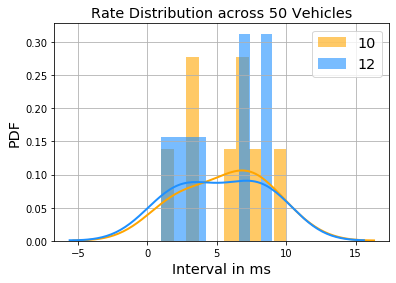

In [21]:
# plt.imshow(dqn, cmap='hot', interpolation='nearest')
# plt.show()
import seaborn as sns

## periodicity = {10: 3, 11: 3, 12: 4, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3}

fig, ax1 = plt.subplots()
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(dqn[10], color="orange", bins = 10, label='10', **kwargs)
sns.distplot(dqn[12], color="dodgerblue", bins = 10, label="12", **kwargs)
# sns.distplot(raoit_50U_2_endrate, color="green", bins = 5, label="$\mathit{TAoI}$, $\\tau_{p,th}$=0.2m", **kwargs)
legend = ax1.legend(loc='best', shadow=False, fontsize='x-large')
plt.xlabel('Interval in ms', fontsize='x-large')
plt.ylabel('PDF', fontsize='x-large')
ax1.set_title('Rate Distribution across 50 Vehicles', fontsize='x-large')
plt.grid()